In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import matplotlib.backends.backend_pdf as pdf

import eleanor_constants as EL

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

savename = "./figures/S1.pdf"

- Print minimum and maximum values for all variables to make sure axes ranges is appropriate

In [2]:
df = pd.read_csv('./data/trajectories/summary/cleaned_animal_analyses.csv')

fed = df[(df["A_starved"] == "no")]
starved = df[(df["A_starved"] == "1day")]

f_fed = fed[fed["A_sex"] == "f"]
f_str = starved[starved["A_sex"] == "f"]
m_fed = fed[fed["A_sex"] == "m"]
m_str = starved[starved["A_sex"] == "m"]
print(len(f_fed), len(f_str), len(m_fed), len(m_str))

tests = ["A_median_speed", "A_time_move", "A_time_wall", "A_larvae_length_mm"]
for test in tests:
    print(test, df[test].min(), df[test].max())

135 89 153 122
A_median_speed 0.3020573815654933 1.805629414946551
A_time_move 0.02612562534741523 0.8453837597330367
A_time_wall 0.13737486095661847 0.9727474972191325
A_larvae_length_mm 4.6 7.7


0 mean: 6.583703703703703
1 mean: 6.01685393258427
2 mean: 6.0555555555555545
3 mean: 5.727049180327869


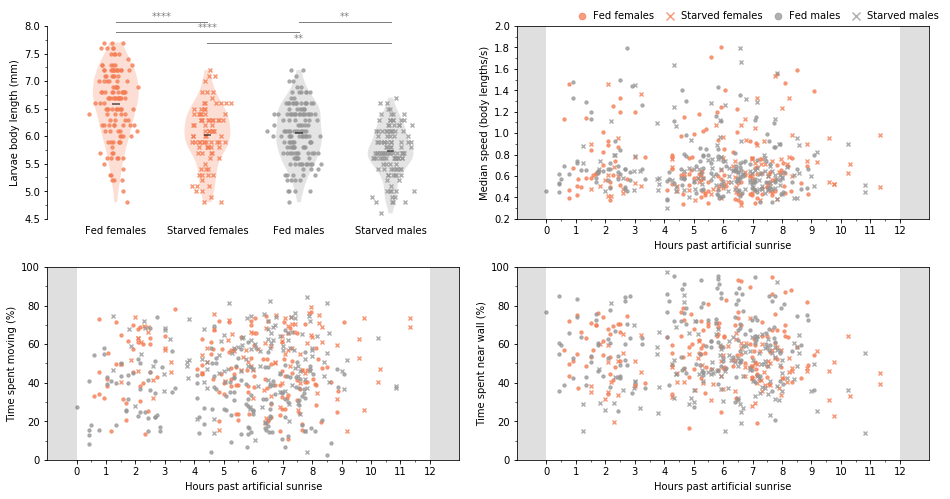

In [3]:
tests = ["A_median_speed", "A_time_move", "A_time_wall"]
names = ["Median speed (body lengths/s)", 
         "Time spent moving (%)", 
         "Time spent near wall (%)"]

fig = plt.figure(figsize=(14, 7))
grid = matplotlib.gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(grid[0, 0], facecolor="None")
ax2 = fig.add_subplot(grid[0, 1], facecolor="None")
ax3 = fig.add_subplot(grid[1, 0], facecolor="None")
ax4 = fig.add_subplot(grid[1, 1], facecolor="None")

data = [f_fed["A_larvae_length_mm"].values, f_str["A_larvae_length_mm"].values, 
        m_fed["A_larvae_length_mm"].values, m_str["A_larvae_length_mm"].values ]
jitter = [np.random.normal(scale=0.1, size=len(f_fed)), np.random.normal(scale=0.1, size=len(f_str)),
          np.random.normal(scale=0.1, size=len(m_fed)), np.random.normal(scale=0.1, size=len(m_str))]

parts = ax1.violinplot(data, showmeans=False, showmedians=False,showextrema=False)
colors = [EL.c_female, EL.c_female, EL.c_male, EL.c_male]
markers = ["o", "x", "o", "x"]
markersizes = [EL.s, EL.s+5, EL.s, EL.s+5]

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.25)

for i, (j, d) in enumerate(zip(jitter, data)):
    j = [x+i+1 for x in j]
    ax1.scatter(j, d, alpha=0.75, color=colors[i], zorder=5, s=markersizes[i], 
                marker=markers[i])
    
ax1.set_ylim(4.5, 8)
ax1.set_xlim(0.25, 4.75)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks(np.arange(1, 5, 1))
ax1.set_xticklabels(["Fed females", "Starved females", "Fed males", "Starved males"])
ax1.xaxis.set_ticks_position('none') 
ax1.set_yticks(np.arange(4.5, 8.1, 0.25), minor=True)
ax1.set_ylabel("Larvae body length (mm)")
ylo, yhi = ax1.get_ylim()
xlo, xhi = ax1.get_xlim()
ybit = (yhi-ylo)*0.075
xbit = (xhi-xlo)*0.075

for i, (test, ax) in enumerate(zip(tests, [ax2, ax3, ax4])):
    ax.scatter(f_fed["A_minutes_past_L"]/60, f_fed[test], color=EL.c_female, marker="o", 
               label="Fed females", alpha=0.75, s=EL.s)
    ax.scatter(f_str["A_minutes_past_L"]/60, f_str[test], color=EL.c_female, marker="x", 
               label="Starved females", alpha=0.75, s=EL.s+5)
    ax.scatter(m_fed["A_minutes_past_L"]/60, m_fed[test], color=EL.c_male, marker="o", 
               label="Fed males", alpha=0.75, s=EL.s)
    ax.scatter(m_str["A_minutes_past_L"]/60, m_str[test], color=EL.c_male, marker="x", 
               label="Starved males", alpha=0.75, s=EL.s+5)
    ax.set_ylabel(names[i])
    ax.set_xlabel("Hours past artificial sunrise", labelpad=5)
    ax.set_xticks(np.arange(0, 13, 1))
    ax.set_xticks(np.arange(0, 12.5, 0.5), minor=True)
    ax.set_xlim(-1, 13)
    if test != "A_median_speed":
        ax.set_ylim(0, 1)
        ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
    else: 
        ax.set_ylim(0.2, 2)
        ax.set_yticks(np.arange(0.2, 2, 0.1), minor=True)
    ax.add_patch(pch.Rectangle((-4, 0), 4, 100, facecolor='k', alpha=0.125, lw=0, edgecolor="none"))
    ax.add_patch(pch.Rectangle((12, 0), 4, 100, facecolor='k', alpha=0.125, lw=0, edgecolor="none"))

up, ch, pchv = ax1.get_ylim()[1]*1.01, -0.195, ax.get_ylim()[1]*0.08
ax1.plot([1, 2], [up, up], color="k", lw=1, clip_on=False, alpha=0.5)
ax1.plot([3, 4], [up, up], color="k", lw=1, clip_on=False, alpha=0.5)
ax1.plot([1, 3], [up+ch, up+ch], color="k", lw=1, clip_on=False, alpha=0.5)
ax1.plot([2, 4], [up+2*ch, up+2*ch], color="k", lw=1, clip_on=False, alpha=0.5)

# P values checked after revisions
ax1.text(1.5, up+pchv, "****", alpha=0.5, clip_on=False, ha="center", va="center", zorder=12)
ax1.text(3.5, up+pchv, "**", alpha=0.5, clip_on=False, ha="center", va="center", zorder=12)
ax1.text(2, up+ch+pchv, "****", alpha=0.5, clip_on=False, ha="center", va="center", zorder=12)
ax1.text(3, up+2*ch+pchv, "**", alpha=0.5, clip_on=False, ha="center", va="center", zorder=12)

ch = 0.03
for i, datum in enumerate(data):
    ax1.plot([i+1-ch, i+1+ch], [np.mean(datum)]*2, color="k", alpha=0.5, lw=2, zorder=20)
    print(str(i), 'mean:', np.mean(datum))
    
ax2.legend(frameon=False, loc='upper left', handletextpad=0.1, 
          bbox_to_anchor=(0.1125, 0, 1, 1.125), ncol=4, columnspacing=0.55, markerscale=2)

for ax in [ax3, ax4]:
    # Convert % from out of 1 to out of 100 to match rest of manuscript
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticklabels([0, 20, 40, 60, 80, 100])
    
plt.tight_layout()
fig.subplots_adjust(hspace=0.25)
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()